<a href="https://colab.research.google.com/github/kotharisanjana/CMPE258_DeepLearning_Spring2023/blob/main/Assignment_3/c_NN_Torch_usingbuiltin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Write a colab in pytorch classes based - 3 layer deep neural network for non linear regression using pytorch builtin functionality of modules, backprop etc.**

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn

from typing import Callable

In [2]:
# Generate non-linear data

n = 500
dim = 3
x = torch.rand(n, dim).float()
print('Input tensor shape =', x.shape)

Input tensor shape = torch.Size([500, 3])


In [3]:
# Initialize weights and bias

weights = torch.tensor([[2.0, -3.0, 6.0]]).T
bias = torch.tensor([[8]])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = (torch.einsum('ij, jk -> ik', (x**3),  weights) + torch.einsum('ij, jk -> ik', (x**2),  weights) + torch.einsum('ij, jk -> ik', x, weights) + bias).float()
print('Function output shape =', y_true.shape)

Weights shape = torch.Size([3, 1])
Bias shape = torch.Size([1, 1])
Function output shape = torch.Size([500, 1])


In [4]:
input_dim = dim
output_dim = 1
hidden_dim = 32

learning_rate = 0.01
num_epochs = 100

In [5]:
# Non-linear model

class Model(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, hidden_dim)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

In [7]:
# Traning non-linear model

def torch_fit(x, y_true, model, loss, optimizer, lr, num_epochs):
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x)
    loss_value = loss(y_pred_tensor, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    loss_value.backward()
    optimizer.step()

In [8]:
# Initialize loss and model class objects

loss = nn.MSELoss()
model = Model(input_dim, output_dim, hidden_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
# Train model

torch_fit(x, y_true, model, loss, optimizer, learning_rate, num_epochs)

Epoch 0, loss 218.96676635742188
Epoch 1, loss 207.81533813476562
Epoch 2, loss 194.0474395751953
Epoch 3, loss 170.6493682861328
Epoch 4, loss 126.05561828613281
Epoch 5, loss 56.17306137084961
Epoch 6, loss 32.84148406982422
Epoch 7, loss 32.5358772277832
Epoch 8, loss 29.658336639404297
Epoch 9, loss 29.685623168945312
Epoch 10, loss 27.022233963012695
Epoch 11, loss 27.66356658935547
Epoch 12, loss 24.91720199584961
Epoch 13, loss 26.555557250976562
Epoch 14, loss 23.346031188964844
Epoch 15, loss 26.542034149169922
Epoch 16, loss 22.275543212890625
Epoch 17, loss 27.77495765686035
Epoch 18, loss 21.626758575439453
Epoch 19, loss 29.927490234375
Epoch 20, loss 20.879804611206055
Epoch 21, loss 31.584938049316406
Epoch 22, loss 19.842344284057617
Epoch 23, loss 32.08219909667969
Epoch 24, loss 18.74952507019043
Epoch 25, loss 31.900836944580078
Epoch 26, loss 17.699445724487305
Epoch 27, loss 31.27452278137207
Epoch 28, loss 16.700597763061523
Epoch 29, loss 30.285234451293945
Epoch

As the number of epcohs increases, the loss goes down, showing that the network is learning the function we want it to learn.

In [10]:
# Initialize loss and model class objects
loss = nn.MSELoss()
model = Model(input_dim, output_dim, hidden_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# One forward and backward pass for visualization
optimizer.zero_grad()
y_pred_tensor = model(x)
loss_value = loss(y_pred_tensor, y_true)
print(loss_value)
loss_value.backward()
optimizer.step()

y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(217.6727, grad_fn=<MseLossBackward0>)
tensor(199.7184, grad_fn=<MseLossBackward0>)


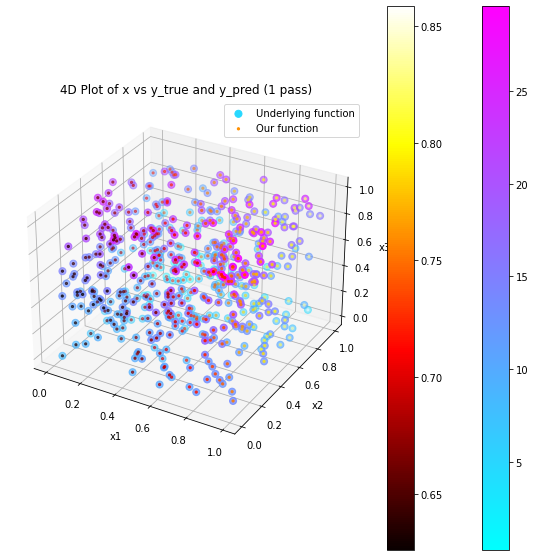

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()

We can see from the plot that 'our function' is contradciting the 'underlying function' (by matching the colors on the color bar). This is because we ran only one epoch and that wasn't sufficient for the network to learn the correct weights and biases so as to minimize the loss (approach the underlying function). However, as see from the loss with the epochs, as the epochs are increasing the MSE loss reduces showing that the netwrok is learning the underlying function correctly.